# CS519 Group Project
Testing that we can read and display MRI data from internet

Dataset downloaded from 
https://www.openfmri.org/dataset/ds000253/
on 11/11/2020 8:30pm

\# https://s3.amazonaws.com/openneuro/ds000253/ds000253_R1.0.0/compressed/ds000253_R1.0.0_sub01-09.zip
\# https://s3.amazonaws.com/openneuro/ds000253/ds000253_R1.0.0/compressed/ds000253_R1.0.0_mriqc_metadata.zip

This code based on BIDS tutorial @ https://github.com/bids-standard/pybids/blob/master/examples/pybids_tutorial.ipynb

In [1]:
from bids import BIDSLayout
layout = BIDSLayout("ds000253_R1.0.0")

/home/rdbisch/UofI/CS519/project/cs519_venv/lib/python3.8/site-packages/bids/layout/models.py:148: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  warnings.warn("The 'extension' entity currently excludes the leading dot ('.'). "


In [3]:
all_files = layout.get()
print("There are {} files in the layout.".format(len(all_files)))
print("\nThe first 10 files are:")
all_files[:10]

There are 153 files in the layout.

The first 10 files are:


[<BIDSFile filename='/home/rdbisch/UofI/CS519/project/ds000253_R1.0.0/CHANGES'>,
 <BIDSJSONFile filename='/home/rdbisch/UofI/CS519/project/ds000253_R1.0.0/dataset_description.json'>,
 <BIDSDataFile filename='/home/rdbisch/UofI/CS519/project/ds000253_R1.0.0/participants.tsv'>,
 <BIDSFile filename='/home/rdbisch/UofI/CS519/project/ds000253_R1.0.0/README'>,
 <BIDSImageFile filename='/home/rdbisch/UofI/CS519/project/ds000253_R1.0.0/sub-01/anat/sub-01_T1w.nii.gz'>,
 <BIDSJSONFile filename='/home/rdbisch/UofI/CS519/project/ds000253_R1.0.0/sub-01/func/sub-01_task-localizer_bold.json'>,
 <BIDSImageFile filename='/home/rdbisch/UofI/CS519/project/ds000253_R1.0.0/sub-01/func/sub-01_task-localizer_bold.nii.gz'>,
 <BIDSDataFile filename='/home/rdbisch/UofI/CS519/project/ds000253_R1.0.0/sub-01/func/sub-01_task-localizer_events.tsv'>,
 <BIDSJSONFile filename='/home/rdbisch/UofI/CS519/project/ds000253_R1.0.0/sub-01/func/sub-01_task-run1_bold.json'>,
 <BIDSImageFile filename='/home/rdbisch/UofI/CS519/p

In [4]:
bf = layout.get()[4]
bf

<BIDSImageFile filename='/home/rdbisch/UofI/CS519/project/ds000253_R1.0.0/sub-01/anat/sub-01_T1w.nii.gz'>

In [5]:
bf.get_entities()

{'datatype': 'anat', 'extension': 'nii.gz', 'subject': '01', 'suffix': 'T1w'}

In [6]:
test = bf.get_image()

In [7]:
print(test)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (192, 256, 256)
affine: 
[[ 9.99847531e-01 -4.39310540e-03 -1.57607142e-02 -9.63154984e+01]
 [ 1.04716364e-02  8.73462439e-01  3.40401649e-01 -7.98037872e+01]
 [ 1.39616346e-02 -3.40514839e-01  8.73375356e-01 -7.85818481e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 192 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.        0.9999998 0.9375    0.9375    1.9       1.        1.
 1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max 

In [8]:
test.shape

(192, 256, 256)

https://nipy.org/nibabel/coordinate_systems.html

Text(0.5, 0.98, 'Center slices for EPI image')

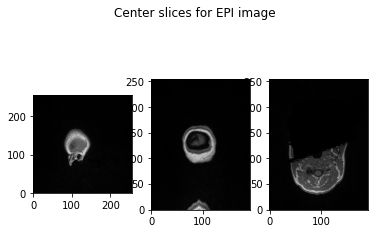

In [11]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

test_fdata = test.get_fdata()
slice_0 = test_fdata[26, :, :]
slice_1 = test_fdata[:, 30, :]
slice_2 = test_fdata[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image") 